## 5. Math - Linear Algebra

Linear Algebra is the branch of mathematics that studies [vector spaces](https://en.wikipedia.org/wiki/Vector_space) and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc.

Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.

### 5.1 Vectors

Vectors can be efficently implemented using Numpy `ndarray`

#### Vector Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [4]:
import numpy as np
u = np.array([2, 5])
v = np.array([3, 1])

def vector_norm(vector, p):
    squares = [element**p for element in vector]
    return sum(squares)**(1/p)

print("||", u, "|| =", vector_norm(u,2))

|| [2 5] || = 5.385164807134504


However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [5]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

#### Vector arithmetic  operation
As `ndarray`, vector addition and multiplication are performed *elementwise*: vectorization

#### Zero, unit, normalized vectors, dot product
* A **zero-vector** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

* **Dot product** (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

    - $\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$, where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.
    - Another way to calculate the dot product is: $\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

But a *much* more efficient implementation is provided by NumPy with the `dot` function:

In [24]:
np.dot(u,v)

11

Equivalently, you can use the `dot` method of `ndarray`s:

In [25]:
u.dot(v)

11

**Caution**: the `*` operator will perform an *elementwise* multiplication, *NOT* a dot product:

In [26]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

#### 6.1.4. Calculating the angle between vectors

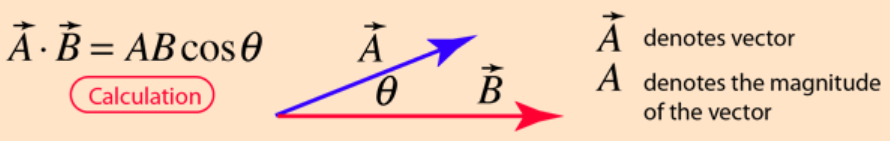

One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [27]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.868539395286 radians
      = 49.7636416907 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside of the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

### Matrices
A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling.

#### Square, triangular, diagonal and identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

You can construct a diagonal matrix using NumPy's `diag` function:

In [38]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the `diag` function, it will happily extract the diagonal values:

In [39]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Numpy's `eye` function returns the identity matrix of the desired size:

In [40]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below.

#### Adding matrices
If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. Addition is performed *elementwise*: the result is also a $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matric $B$ and compute $A + B$:

In [9]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

In [13]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

#### Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's multiply two matrices in NumPy, using `ndarray`'s `dot` method:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [20]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Let's check this result by looking at one element, just to be sure: looking at $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [21]:
40*5 + 50*17 + 60*31

2910

In [22]:
E[1,2]  # row 2, column 3

2910


We multiplied a $2 \times 3$ matrix by a $3 \times 4$ matrix, so the result is a $2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiple $D$ by $A$, we get an error because D has 4 columns while A has 2 rows:

In [23]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


**Caution**: NumPy's `*` operator performs elementwise multiplication, *NOT* a matrix multiplication:

In [24]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

#### Matrix transpose
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$

Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix.

Note: there are a few other notations, such as $M^t$, $M′$, or ${^t}M$.

In NumPy, a matrix's transpose can be obtained simply using the `T` attribute: `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [67]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [68]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

As you might expect, transposing a matrix twice returns the original matrix:

In [69]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that $(Q + R)^T = Q^T + R^T$. For example:

In [70]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [71]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$. Note that the order is reversed. For example:

In [72]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [73]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A **symmetric matrix** $M$ is defined as a matrix that is equal to its transpose: $M^T = M$. This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

The product of a matrix by its transpose is always a symmetric matrix, for example:

In [74]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

####  Converting 1D arrays to 2D arrays in NumPy
As we mentionned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [75]:
u

array([2, 5])

In [76]:
u.T

array([2, 5])

We want to convert $\textbf{u}$ into a row vector before transposing it. There are a few ways to do this:

In [77]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (ie. a 1x2 matrix). In other words it really is a **row vector**.

In [78]:
u[np.newaxis, :]

array([[2, 5]])

This quite explicit: we are asking for a new vertical axis, keeping the existing data as the horizontal axis.

In [79]:
u[np.newaxis]

array([[2, 5]])

In [ ]:
u.shape

This is equivalent, but a little less explicit.

In [80]:
u[None]

array([[2, 5]])

This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that `np.newaxis` is actually equal to `None`, so this is equivalent to the previous version.

Ok, now let's transpose our row vector:

In [81]:
u_row.T

array([[2],
       [5]])

Great! We now have a nice **column vector**.

Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:

In [82]:
u[:, np.newaxis]

array([[2],
       [5]])

####  Matrix inverse


Any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$
and $f$ is defined as:
$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors.

Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? 

When it exists, such a matrix is called the **inverse** of $F$, and it is noted $F^{-1}$.

In [30]:
F = np.array([
    [1, -1.5],
    [0, 1]
])
F

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

We defined the inverse matrix $F^{-1}$ manually this time, but NumPy provides an `inv` function to compute a matrix's inverse, so we could have written instead:

In [31]:
F_inv = LA.inv(F)
F_inv

array([[1. , 1.5],
       [0. , 1. ]])

As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$F \cdot F^{-1} = F^{-1} \cdot F = I$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

In [32]:
F.dot(LA.inv(F))

array([[1., 0.],
       [0., 1.]])

Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:

$H^{-1} = H^T$

Therefore:

$H \cdot H^T = H^T \cdot H = I$

It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not rescaling, shearing or squeezing.  

In [33]:
LA.det(F)

1.0

####  Singular Value Decomposition

[singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

For example, let's decompose the $F$ transformation:

In [34]:
U, S_diag, V_T = LA.svd(F) 
U

array([[ 0.89442719,  0.4472136 ],
       [-0.4472136 ,  0.89442719]])

In [35]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [126]:
S = np.diag(S_diag)
S

array([[ 2. ,  0. ],
       [ 0. ,  0.5]])

#### Eigenvectors and eigenvalues

[eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. 

In [40]:
import numpy.linalg as linalg

M = np.array([[1,2,3],[5,7,11],[21,29,31]])
print(M)

eigenvalues, eigenvectors = LA.eig(M)
eigenvalues # [λ0, λ1, …]

[[ 1  2  3]
 [ 5  7 11]
 [21 29 31]]


array([42.26600592, -0.35798416, -2.90802176])

In [41]:
eigenvectors # [v0, v1, …]

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

#### Solving a system of linear scalar equations

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [42]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Let's check the solution:

In [43]:
coeffs.dot(solution), depvars  # yep, it's the same

(array([ 6., -9.]), array([ 6, -9]))

Looks good! Another way to check the solution:

In [44]:
np.allclose(coeffs.dot(solution), depvars)

True